# Utilizando a biblioteca Pandas

In [61]:
import pandas as pd

## pd.Series

Uma `pd.Series` é um dos objetos centrais do Pandas. Podem ser utilizados para representar listas de valores.

In [62]:
mySeries = pd.Series([1, 2, 3, 4, 5])

In [64]:
mySeries

0    1
1    2
2    3
3    4
4    5
dtype: int64

### Também podemos inicializar uma Series de outras formas

In [67]:
mySeriesFromDict = pd.Series({
    'primeiro': 1, 
    'segundo': 3, 
    'terceiro': 2, 
    'outra-chave': 'Raul'
})

In [68]:
mySeriesFromDict

primeiro          1
segundo           3
terceiro          2
outra-chave    Raul
dtype: object

In [6]:
mySeriesFromDict['outra-chave']

'Raul'

In [7]:
mySeriesFromDict['segundo']

3

### Podemos alterar valores de uma Series através de seu index e adicionar novos pares chave-valor

In [69]:
mySeriesFromDict['outra-chave'] = 'Maria'

In [70]:
mySeriesFromDict

primeiro           1
segundo            3
terceiro           2
outra-chave    Maria
dtype: object

In [71]:
mySeriesFromDict['chave-que-não-existe'] = 9

In [72]:
mySeriesFromDict

primeiro                    1
segundo                     3
terceiro                    2
outra-chave             Maria
chave-que-não-existe        9
dtype: object

### Obtendo o tamanho de uma Series utilizando a função `len()`

In [73]:
len(mySeries)

5

In [74]:
mySeriesWithNameAndIndex = pd.Series([1, 2, 2, 3], index=["primeiro", "segundo", "terceiro", "quarto"], name="Lista")

In [75]:
mySeriesWithNameAndIndex

primeiro    1
segundo     2
terceiro    2
quarto      3
Name: Lista, dtype: int64

### É possível obter um valor da Series através de seu index

In [76]:
mySeriesWithNameAndIndex["segundo"]

2

In [77]:
mySeriesWithNameAndIndex["primeiro"]

1

### Indexando valores

Podemos indexar valores através de `.loc` e `.iloc`

#### `.loc` para indexar valores pelo index definido

In [78]:
mySeriesFromDict.loc['primeiro']

1

In [79]:
mySeriesFromDict.loc['outra-chave']

'Maria'

#### `.iloc` para utilizar o indexador numérico de `0` a `length-1`

In [80]:
mySeriesFromDict.iloc[0]

1

In [20]:
mySeriesFromDict.iloc[3]

'Maria'

### Somando todos o itens de uma Series

In [81]:
mySeriesWithNameAndIndex.sum()

8

### Obtendo média, mediana e moda de uma Series

In [84]:
mySeriesWithNameAndIndex

primeiro    1
segundo     2
terceiro    2
quarto      3
Name: Lista, dtype: int64

In [85]:
print(f'Média: {mySeriesWithNameAndIndex.mean()} - Mediana: {mySeriesWithNameAndIndex.median()} - Moda: {mySeriesWithNameAndIndex.mode()}')

Média: 2.0 - Mediana: 2.0 - Moda: 0    2
Name: Lista, dtype: int64


### Convertendo uma pd.Series para uma lista Python

In [86]:
mySeriesWithNameAndIndex.to_list()

[1, 2, 2, 3]

### Obtendo valores máximo e mínimo de uma Series

In [87]:
print(f'Max: {mySeriesWithNameAndIndex.max()} - Min: {mySeriesWithNameAndIndex.min()}')

Max: 3 - Min: 1


### Ordenando uma Series

In [88]:
mySeries = pd.Series([3, 1, 4, 5, 9, 2, 1, 7, 8, 2, 3, 5, 9])

In [89]:
mySeries

0     3
1     1
2     4
3     5
4     9
5     2
6     1
7     7
8     8
9     2
10    3
11    5
12    9
dtype: int64

In [95]:
mySeries.sort_values(inplace=True)

In [96]:
mySortedSeries

In [97]:
mySeries

1     1
6     1
5     2
9     2
0     3
10    3
2     4
3     5
11    5
7     7
8     8
4     9
12    9
dtype: int64

## pd.DataFrame

Um `pd.DataFrame` pode ser pensado como uma tabela. É basicamente um dicionário de `pd.Series`.

In [98]:
myTable = pd.DataFrame({'coluna 1': [1, 2, 3], 'coluna 2': [4, 5, 6], 'coluna 3': [7, 8, 9]})

In [99]:
myTable

,coluna 1,coluna 2,coluna 3
0,1,4,7
1,2,5,8
2,3,6,9


Cada coluna de um `pd.DataFrame` é uma `pd.Series`, e nós podemos acessá-la assim

In [100]:
myTable['coluna 2']

0    4
1    5
2    6
Name: coluna 2, dtype: int64

In [32]:
type(myTable['coluna 2'])

pandas.core.series.Series

### Indexando

In [101]:
myTable.index = ['linha 1', 'linha 2', 'linha 3']

In [103]:
myTable

,coluna 1,coluna 2,coluna 3
linha 1,1,4,7
linha 2,2,5,8
linha 3,3,6,9


In [102]:
myTable['coluna 1'] # obtém uma coluna

linha 1    1
linha 2    2
linha 3    3
Name: coluna 1, dtype: int64

In [35]:
myTable.loc['linha 1'] # obtém uma linha utilizando o índice definido

coluna 1    1
coluna 2    4
coluna 3    7
Name: linha 1, dtype: int64

In [36]:
myTable.iloc[0] # obtém uma linha utilizando o índice numérico

coluna 1    1
coluna 2    4
coluna 3    7
Name: linha 1, dtype: int64

In [37]:
myTable[0:2] # obtém um DataFrame com uma seleção de linhas

,coluna 1,coluna 2,coluna 3
linha 1,1,4,7
linha 2,2,5,8


In [38]:
myTable[[False, True, True]] # obtém um DataFrame com uma seleção de linhas de acordo com uma condição booleana

,coluna 1,coluna 2,coluna 3
linha 2,2,5,8
linha 3,3,6,9


In [108]:
myTable[myTable['coluna 1'] % 2 == 0] # obtém um DataFrame com uma seleção de linhas de acordo com uma condição booleana

,coluna 1,coluna 2,coluna 3
linha 2,2,5,8


### Adicionando novas colunas

In [113]:
myTable['nova coluna'] = [10, 11, None]

In [114]:
myTable

,coluna 1,coluna 2,coluna 3,nova coluna
linha 1,1,4,7,10.0
linha 2,2,5,8,11.0
linha 3,3,6,9,NaN


In [115]:
myTable['coluna 1 é par?'] = myTable['coluna 1'] % 2 == 0

In [116]:
myTable

,coluna 1,coluna 2,coluna 3,nova coluna,coluna 1 é par?
linha 1,1,4,7,10.0,False
linha 2,2,5,8,11.0,True
linha 3,3,6,9,NaN,False


In [117]:
myTable['coluna 1 + coluna 3'] = myTable['coluna 1'] + myTable['coluna 3']

In [118]:
myTable

,coluna 1,coluna 2,coluna 3,nova coluna,coluna 1 é par?,coluna 1 + coluna 3
linha 1,1,4,7,10.0,False,8
linha 2,2,5,8,11.0,True,10
linha 3,3,6,9,NaN,False,12


### Filtrando dados

In [119]:
myTable[myTable['coluna 1'] >= 2]

,coluna 1,coluna 2,coluna 3,nova coluna,coluna 1 é par?,coluna 1 + coluna 3
linha 2,2,5,8,11.0,True,10
linha 3,3,6,9,NaN,False,12


In [120]:
myTable[myTable['coluna 1 é par?']]

,coluna 1,coluna 2,coluna 3,nova coluna,coluna 1 é par?,coluna 1 + coluna 3
linha 2,2,5,8,11.0,True,10


### Transpondo a tabela (linhas viram colunas, colunas viram linhas)

In [121]:
myTable.T

,linha 1,linha 2,linha 3
coluna 1,1,2,3
coluna 2,4,5,6
coluna 3,7,8,9
nova coluna,10.0,11.0,NaN
coluna 1 é par?,False,True,False
coluna 1 + coluna 3,8,10,12


## Exemplos de datasets

In [49]:
from sklearn import datasets

In [50]:
iris = datasets.load_iris()

In [51]:
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)

In [52]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}

In [54]:
irisDF['target'] = iris.target
irisDF['target_name'] = irisDF['target'].map(target_names)

In [55]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>

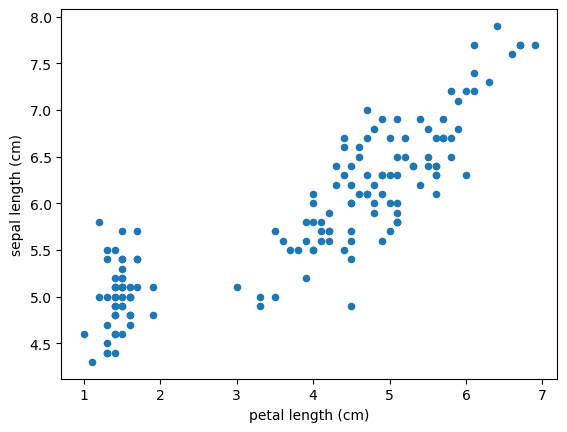

In [59]:
irisDF.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)')